In [1]:
%matplotlib inline
from datetime import datetime
import glob
import numpy as np
import matplotlib.pyplot as plt
from eigsep_corr import io

In [7]:
files = sorted(glob.glob('/home/christian/Documents/research/eigsep/eigsep_corr/eigsep_corr/data/data/night2/*.eig'))[150:-5]
print(len(files))
file_times = [datetime.strptime(f[-19:-4], "%Y%m%d_%H%M%S") for f in files]
file_dt = [(f-file_times[0]).total_seconds() for f in file_times]
hdr = io.read_header(files[0])
print(io.read_header(files[0]).keys())
freqs = np.linspace(0, hdr['sample_rate'] / 2, hdr['nchan'], endpoint=False)
hdr, data = io.read_file(files[0], header=hdr)
print(data.keys())
print(data['0'].shape)
acc_cnt = []
times = []
sync_time = []
for f in files:
    hdr = io.read_header(f)
    acc_cnt.append(hdr['acc_cnt'])
    times.append(hdr['times'])
    sync_time.append(hdr["sync_time"])
acc_cnt = np.array(acc_cnt)
times = np.array(times)
sync_time = np.array(sync_time)
print(np.allclose(np.diff(sync_time), 0))
dt = (times-times[0, 0])

788
dict_keys(['dtype', 'infochan', 'nchan', 'acc_bins', 'fpg_file', 'fpg_version', 'sample_rate', 'gain', 'corr_acc_len', 'corr_scalar', 'pol01_delay', 'pam_atten', 'fft_shift', 'pairs', 'acc_cnt', 'sync_time', 'header_size', 'data_start', 'filename', 'filesize', 'nspec', 'freqs', 'dfreq', 'inttime', 'times'])
dict_keys(['0', '1', '2', '3', '4', '5', '02', '04', '24', '13', '15', '35'])
(60, 2, 1024, 1)
True


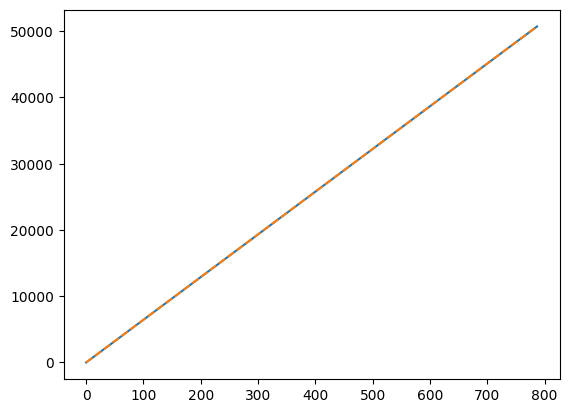

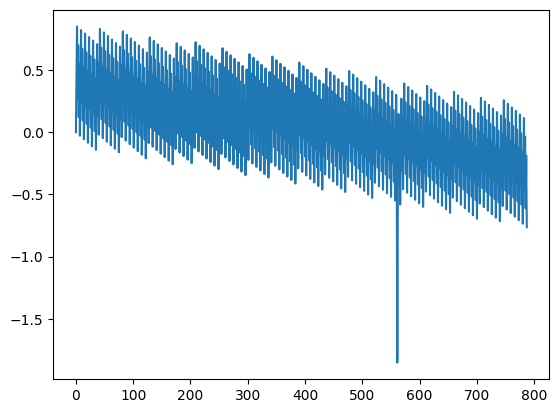

In [8]:
plt.figure()
plt.plot(2*dt[:, 0])
plt.plot(file_dt, ls="--")
plt.show()
plt.figure()
plt.plot(2*dt[:, 0]-file_dt)
plt.show()